In [ ]:
path_to_src = '/content/drive/MyDrive/Colab Notebooks/GNN/MoTSE-main/src'
dataset_name = "PCBA"
dataset_metrics = ['roc_auc','auprc']
metric = 'roc_auc'

#If using Google drive
from google.colab import drive
drive.mount('/content/drive')
# get the current working directory
import sys
sys.path.insert(0,path_to_src)

Mounted at /content/drive


In [81]:
def performance_summary_plot(dataset_name, dataset_metrics, metric):
  results_path = path_to_src + f'/../results/{dataset_name}/GCN/'
  fig, ax = plt.subplots()
  run_type_to_label = {'1000':'scratch','10000->1000':'MoTSE','multi1000':'multi MoTSE'}
  for i, run_type in enumerate(['1000', '10000->1000','multi1000']):
    #Compile results into a single df
    curr_results = None
    for run in ['1', '2', '3']:
      temp_results = pd.read_csv(results_path + run_type + '/results' + run + '.csv') #CHANGE BACK
      temp_results['task'] = temp_results['task'].astype("string")
      temp_results = temp_results[["task", metric]]
      temp_results = temp_results.rename(columns={metric: metric + "_" + run})
      if run == '1':
        curr_results = temp_results
      else:
        curr_results = pd.merge(curr_results, temp_results, on='task', how='outer')
    curr_results['mean'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].mean(axis=1)
    curr_results['std'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].std(axis=1)
    curr_results['max'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].max(axis=1) + 0.0000001
    curr_results['min'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].min(axis=1) - 0.0000001
    curr_results.loc['mean'] = curr_results.mean()
    curr_results.at['mean', 'task'] = 'avg'
    print(run_type_to_label[run_type])
    print(curr_results[curr_results['task'] == 'avg'])
    #Plot results
    trans = Affine2D().translate(-0.1 + i*0.05, 0.0) + ax.transData
    #err = np.array(list(zip(curr_results['mean'] - curr_results['min'], curr_results['max'] - curr_results['mean']))).T
    info = ax.errorbar(curr_results['task'], curr_results['mean'], yerr=curr_results['std'], marker=".", linestyle="none", label = run_type_to_label[run_type], transform=trans)
    plt.xticks(rotation=45)
    ax.set_title(f'Performance of Scratch, MoTSE, and MoTSE-Multi on {dataset_name}')
    plt.ylabel(metric)
    ax.legend()
  plt.show()

# Analysis on QM9

<ipython-input-81-3dd7486a9998>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  curr_results.loc['mean'] = curr_results.mean()
<ipython-input-81-3dd7486a9998>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  curr_results.loc['mean'] = curr_results.mean()
<ipython-input-81-3dd7486a9998>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of nume

scratch
     task    r2_1    r2_2    r2_3    mean       std     max     min
mean  avg  0.5578  0.5594  0.5604  0.5592  0.006807  0.5663  0.5532
MoTSE
     task    r2_1    r2_2    r2_3      mean       std     max     min
mean  avg  0.6022  0.5959  0.5523  0.583467  0.030293  0.6072  0.5517
multi MoTSE
     task    r2_1    r2_2    r2_3    mean       std     max     min
mean  avg  0.5782  0.5821  0.5782  0.5795  0.006023  0.5847  0.5732


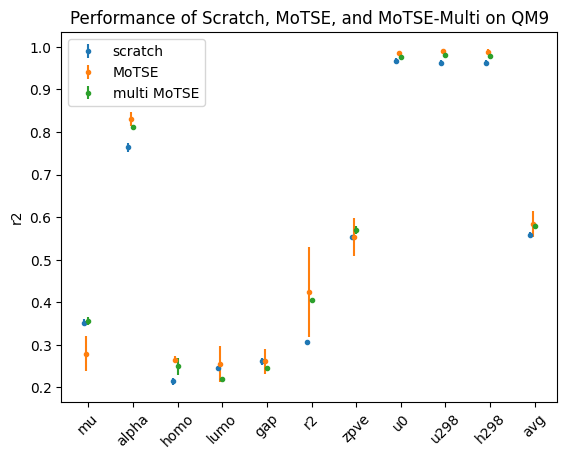

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

dataset_name = "QM9"
dataset_metrics = ['r2','mae']
metric = 'r2'

performance_summary_plot(dataset_name, dataset_metrics, metric)

# Analysis on PCBA

<ipython-input-81-3dd7486a9998>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  curr_results.loc['mean'] = curr_results.mean()
<ipython-input-81-3dd7486a9998>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  curr_results.loc['mean'] = curr_results.mean()
<ipython-input-81-3dd7486a9998>:21: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of nume

scratch
     task  roc_auc_1  roc_auc_2  roc_auc_3      mean       std    max     min
mean  avg     0.6599     0.6605     0.6511  0.657167  0.010032  0.666  0.6468
MoTSE
     task  roc_auc_1  roc_auc_2  roc_auc_3      mean       std    max     min
mean  avg     0.7243     0.7212     0.7225  0.722667  0.003573  0.726  0.7192
multi MoTSE
     task  roc_auc_1  roc_auc_2  roc_auc_3    mean       std     max     min
mean  avg     0.6934     0.6944     0.6918  0.6932  0.003476  0.6962  0.6895


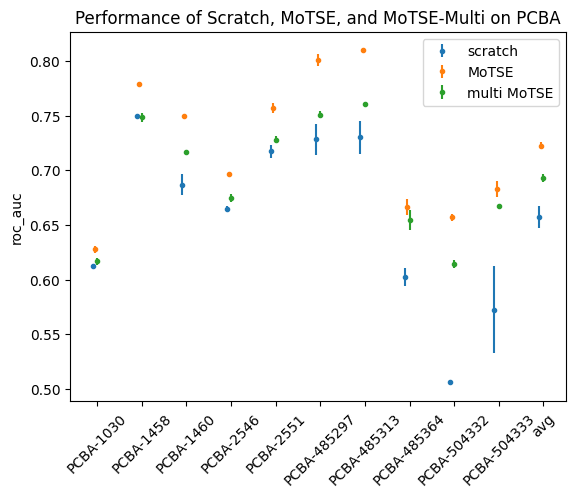

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

dataset_name = "PCBA"
dataset_metrics = ['roc_auc','auprc']
metric = 'roc_auc'

performance_summary_plot(dataset_name, dataset_metrics, metric)

# Analyzing transfer from first, second and third most similar task

In [87]:
def transfer_comparison_plot(dataset_name, dataset_metrics, metric):
  results_path = path_to_src + f'/../results/{dataset_name}/GCN/'
  fig, ax = plt.subplots()
  #Compile results into a single df
  round = 0
  for run_path in ['10000->1000/fullresults', '1000/results']:
    curr_results = None
    for run in ['1', '2', '3']:
      temp_results = pd.read_csv(results_path + run_path + run + '.csv') #CHANGE BACK
      temp_results['task'] = temp_results['task'].astype("string")
      cols = ["task", "source"] if run_path == '10000->1000/fullresults' else ["task"]
      temp_results = temp_results[cols + [metric]]
      temp_results = temp_results.rename(columns={metric: metric + "_" + run})
      if run == '1':
        curr_results = temp_results
      else:
        curr_results = pd.merge(curr_results, temp_results, on=cols, how='outer')
    curr_results['mean'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].mean(axis=1)
    curr_results['std'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].std(axis=1)
    curr_results['max'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].max(axis=1) + 0.0000001
    curr_results['min'] = curr_results[[metric + '_1', metric + '_2', metric + '_3']].min(axis=1) - 0.0000001
    if run_path == '10000->1000/fullresults':
      for i in range(0,3):
        round += 1
        trans = Affine2D().translate(-0.07 + round*0.03, 0.0) + ax.transData
        results_using_ith_most_similar_task = curr_results.iloc[i::3, :]
        results_using_ith_most_similar_task.loc['mean'] = results_using_ith_most_similar_task.mean()
        results_using_ith_most_similar_task.at['mean', 'task'] = 'avg'
        #Plot results
        err = np.array(list(zip(results_using_ith_most_similar_task['mean'] - results_using_ith_most_similar_task['min'], results_using_ith_most_similar_task['max'] - results_using_ith_most_similar_task['mean']))).T
        info = ax.errorbar(results_using_ith_most_similar_task['task'], results_using_ith_most_similar_task['mean'], yerr=results_using_ith_most_similar_task['std'], marker=".", linestyle="none", label = "Transfer " + str(i + 1), transform=trans)
    else:
      curr_results.loc['mean'] = curr_results.mean()
      curr_results.at['mean', 'task'] = 'avg'
      round += 1
      trans = Affine2D().translate(-0.07 + round*0.03, 0.0) + ax.transData
      err = np.array(list(zip(curr_results['mean'] - curr_results['min'], curr_results['max'] - curr_results['mean']))).T
      info = ax.errorbar(curr_results['task'], curr_results['mean'], yerr=curr_results['std'], marker=".", linestyle="none", label = 'Scratch', transform=trans)
  plt.xticks(rotation=45)
  ax.set_title(f'Performance of n-th Most Similar Task Transfer on {dataset_name}')
  ax.legend()
  plt.ylabel(metric)
  plt.show()

<ipython-input-87-d6e53ebee501>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_using_ith_most_similar_task.loc['mean'] = results_using_ith_most_similar_task.mean()
<ipython-input-87-d6e53ebee501>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_using_ith_most_similar_task.loc['mean'] = results_using_ith_most_similar_task.mean()
<ipython-input-87-d6e53ebee501>:27: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select 

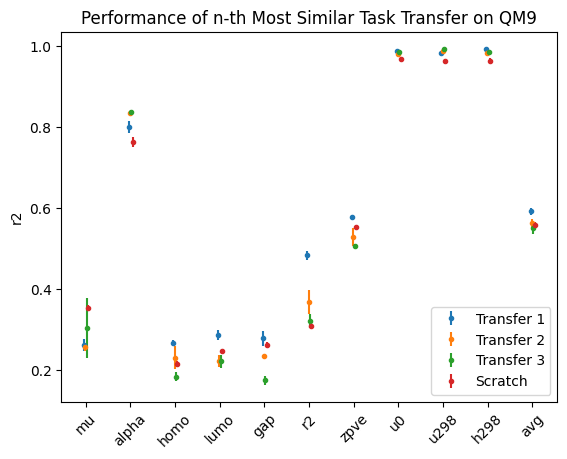

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

dataset_name = "QM9"
dataset_metrics = ['r2','mae']
metric = 'r2'

transfer_comparison_plot(dataset_name, dataset_metrics, metric)

<ipython-input-67-6320d5ec1db1>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  results_using_ith_most_similar_task.loc['mean'] = results_using_ith_most_similar_task.mean()
<ipython-input-67-6320d5ec1db1>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_using_ith_most_similar_task.loc['mean'] = results_using_ith_most_similar_task.mean()
<ipython-input-67-6320d5ec1db1>:26: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select 

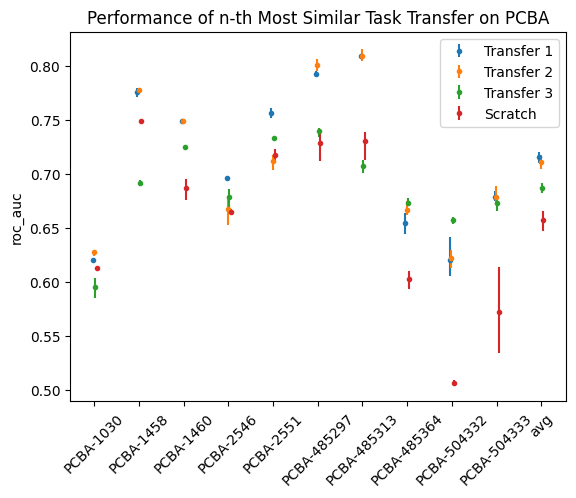

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D

dataset_name = "PCBA"
dataset_metrics = ['roc_auc','auprc']
metric = 'roc_auc'

transfer_comparison_plot(dataset_name, dataset_metrics, metric)